In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
%matplotlib inline

from datetime import datetime as Date
from crypto.libs.marketcap import MarketCap
from crypto.libs.price import Price
from crypto.libs.coins import Coins
from crypto.libs.scraping.refresh import run as MarketCapInit
from crypto.libs import dateutils

import statistics
import numpy as np
import seaborn as sns

In [3]:
marketcap = MarketCap()
coins = Coins()

In [4]:
from datetime import datetime as Date
from crypto.libs.marketcap import MarketCap
from crypto.libs.price import Price
from crypto.libs.coins import Coins
from crypto.libs.scraping.refresh import run as MarketCapInit
from crypto.libs import dateutils

In [5]:
def get_return(coin):
    final = coins.dataset[coins.dataset["Symbol"] == coin][["Date", "Close"]].values[0]
    initial = coins.dataset[coins.dataset["Symbol"] == coin][["Date", "Close"]].values[-1]
    age = (final[0].date() - initial[0].date()).total_seconds() / (60*60*24*7*52)
    return age, (final[1]/initial[1] - 1)

returns = []
all_coins = coins.dataset[coins.dataset["Date"] == Date(2018, 1, 5)]["Symbol"].values
len(all_coins)
for coin in all_coins:
    returns.append(get_return(coin))

len(returns)

1372

### Distribution of returns in percentiles

Percentile: 5th -> -0.95
Percentile: 10th -> -0.75
Percentile: 15th -> -0.49
Percentile: 20th -> -0.24
Percentile: 25th -> 0.05
Percentile: 30th -> 0.43
Percentile: 35th -> 0.81
Percentile: 40th -> 1.74
Percentile: 45th -> 2.71
Percentile: 50th -> 3.66
Percentile: 55th -> 5.2
Percentile: 60th -> 7.53
Percentile: 65th -> 10.76
Percentile: 70th -> 17.19
Percentile: 75th -> 30.64
Percentile: 80th -> 48.72
Percentile: 85th -> 82.37
Percentile: 90th -> 178.06
Percentile: 95th -> 668.84
Percentile: 100th -> 189582.33


(0, 101)

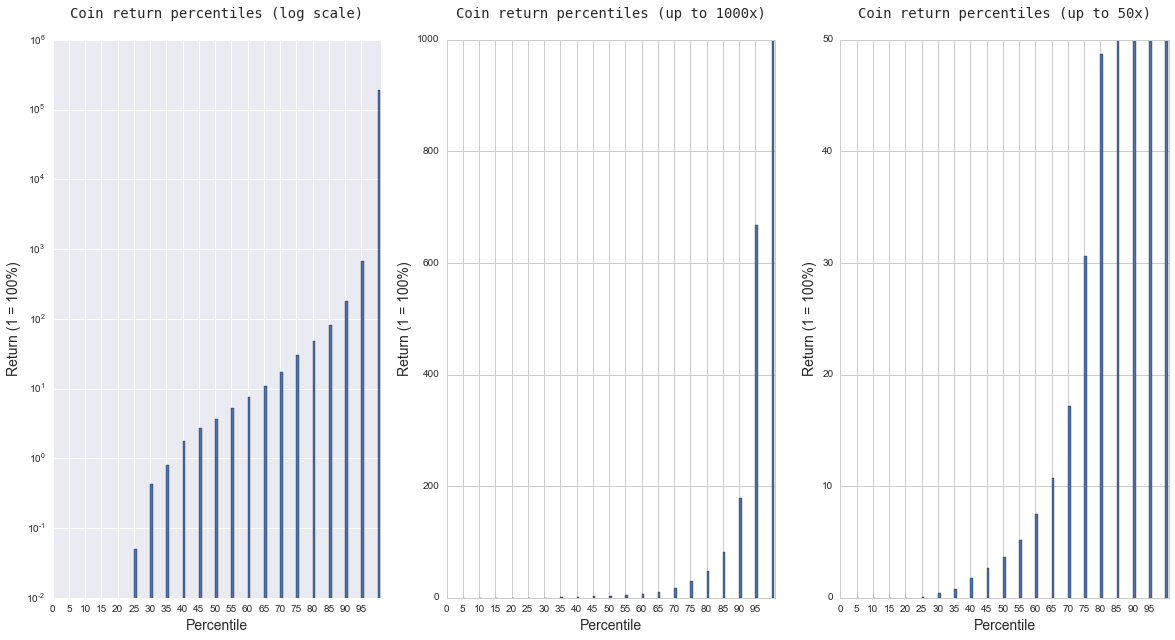

In [6]:
percentiles = []
percentile_r = []

rets = [ret for age, ret in returns]
N = 20
for i in range(0, N):
    percentile =(i + 1.0) / N * 100 
    print ("Percentile: {}th -> {}".format(int(round(percentile, 0)), round(np.percentile(rets, percentile), 2)))
    percentiles.append(percentile)
    percentile_r.append(np.percentile(rets, percentile))
 
fig = plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(131)
sns.set_style('whitegrid')
plt.xticks(range(0, 100, 5))
plt.title("Coin return percentiles (log scale)", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
plt.xlabel("Percentile", fontsize = 14)
plt.ylabel("Return (1 = 100%)", fontsize = 14)

plt.bar(percentiles, percentile_r)
#plt.ylim(0, 1000)
plt.xlim(0, 101)
plt.yscale('log')

plt.subplot(132)
plt.xticks(range(0, 100, 5))
plt.title("Coin return percentiles (up to 1000x)", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
plt.xlabel("Percentile", fontsize = 14)
plt.ylabel("Return (1 = 100%)", fontsize = 14)

plt.bar(percentiles, percentile_r)
plt.ylim(0, 1000)
plt.xlim(0, 101)
plt.subplot(133)
plt.xticks(range(0, 100, 5))
plt.title("Coin return percentiles (up to 50x)", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
plt.xlabel("Percentile", fontsize = 14)
plt.ylabel("Return (1 = 100%)", fontsize = 14)

plt.bar(percentiles, percentile_r)
plt.ylim(0, 50)
plt.xlim(0, 101)

(0, 101)

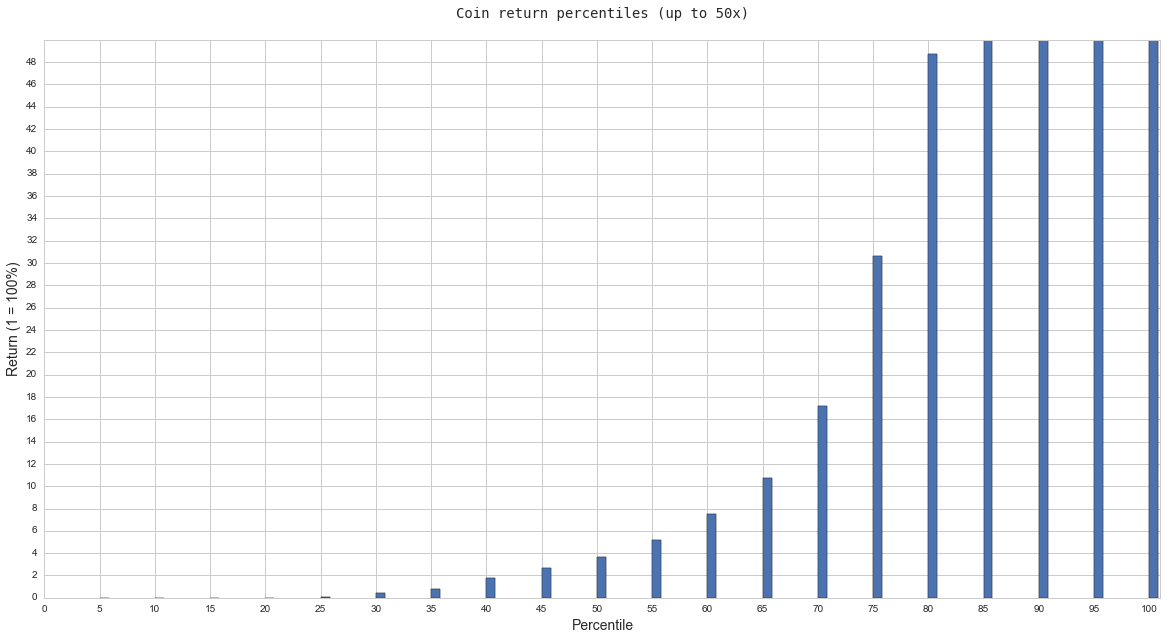

In [7]:
percentiles = []
percentile_r = []

rets = [ret for age, ret in returns]
N = 20
for i in range(0, N):
    percentile =(i + 1.0) / N * 100 
    percentiles.append(percentile)
    percentile_r.append(np.percentile(rets, percentile))
 
fig = plt.figure(figsize=(20,10))
plt.bar(percentiles, percentile_r)
plt.ylim(0, 1000)
plt.xlim(0, 101)
plt.xticks(range(0, 110, 5))
plt.yticks(range(0, 50, 2))
plt.title("Coin return percentiles (up to 50x)", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
plt.xlabel("Percentile", fontsize = 14)
plt.ylabel("Return (1 = 100%)", fontsize = 14)

plt.bar(percentiles, percentile_r)
plt.ylim(0, 50)
plt.xlim(0, 101)

In [8]:
loss_coins = [ret for age, ret in returns if ret < -0.2]
ratio = len(loss_coins) / len(returns) * 100
ratio = round(ratio, 2)
print ("How many coins end up in loss if HODL since ICO - loss more than 0%? \n \
        {}% of coins, i.e. {} coins out of {}".format(ratio, len(loss_coins), len(returns)))

How many coins end up in loss if HODL since ICO - loss more than 0%? 
         20.7% of coins, i.e. 284 coins out of 1372


In [ ]:
np.corrcoef(list1, list2)[0, 1]

### Distribution of returns vs age (normalised, excluding outliers)


Number of coins 1164


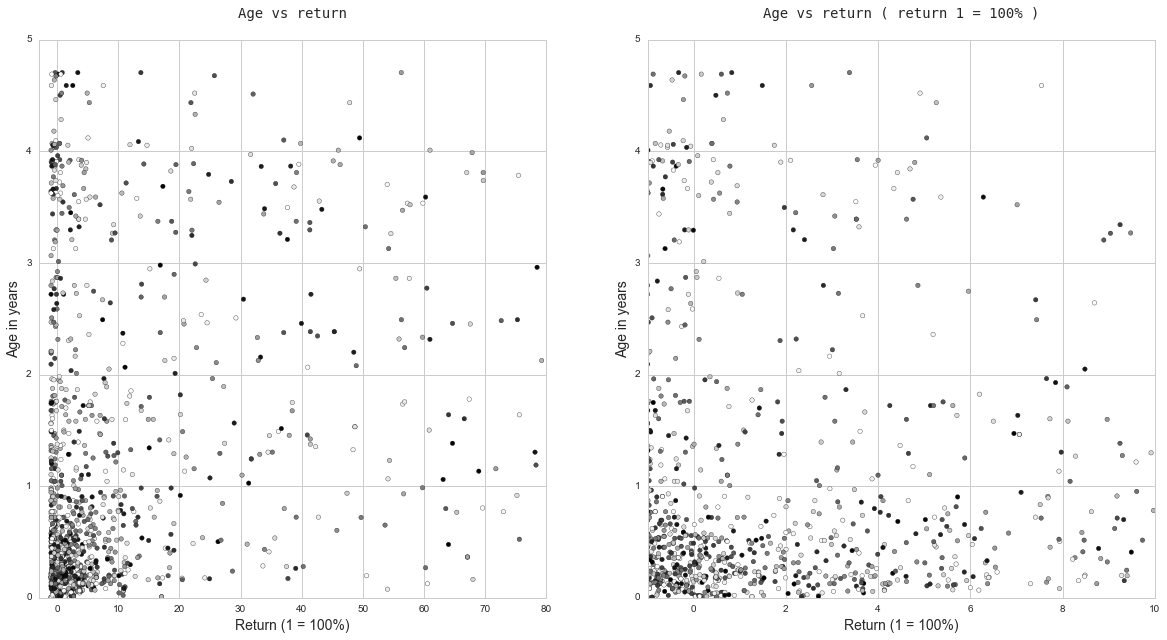

In [9]:
x = [ret for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 80]
y = [age for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 80]
print ("Number of coins {}".format(len(x)))
colors = np.random.rand(len(x))
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

plt.figure(1)
ax = plt.subplot(121)
plt.title("Age vs return", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
plt.scatter(x, y, c=colors)
plt.xlim(-3, 80)
plt.ylim(0, 5)
#ax.set_xlabel("Return where 1 = 100%", )
plt.xlabel("Return (1 = 100%)", fontsize = 14)
plt.ylabel("Age in years", fontsize = 14)

plt.subplot(122)
plt.title("Age vs return ( return 1 = 100% )", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)
x = [ret for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 10]
y = [age for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 10]
plt.xlabel("Return (1 = 100%)", fontsize = 14)
plt.ylabel("Age in years", fontsize = 14)
colors = np.random.rand(len(x))
plt.scatter(x, y, c=colors)
plt.xlim(-1, 10)
plt.ylim(0, 5)
plt.show()

### Based on the age of the coin, how likely are you be in a loss?

In [10]:
ages = [1, 2, 3, 4, 5]
for age_in_years in ages:
    x = [ret for age, ret in returns if age <= age_in_years and age >= age_in_years - 1]
    y = [age for age, ret in returns if age <= age_in_years and age >= age_in_years - 1]
    
    how_many = len([ret for ret in x if ret < 0])
    total = len(x)
    
    print ("Under {} years: {}% or {}/{}".format(
        age_in_years, round(how_many / total * 100, 2), how_many, total))

Under 1 years: 29.96% or 222/741
Under 2 years: 21.12% or 49/232
Under 3 years: 13.1% or 19/145
Under 4 years: 14.36% or 28/195
Under 5 years: 27.12% or 16/59


### Distribution of returns including percentiles

Percentile: 10th -> -0.75x
Percentile: 20th -> -0.24x
Percentile: 30th -> 0.43x
Percentile: 40th -> 1.74x
Percentile: 50th -> 3.66x
Percentile: 60th -> 7.53x
Percentile: 70th -> 17.19x
Percentile: 80th -> 48.72x
Percentile: 90th -> 178.06x
Percentile: 100th -> 189582.33x


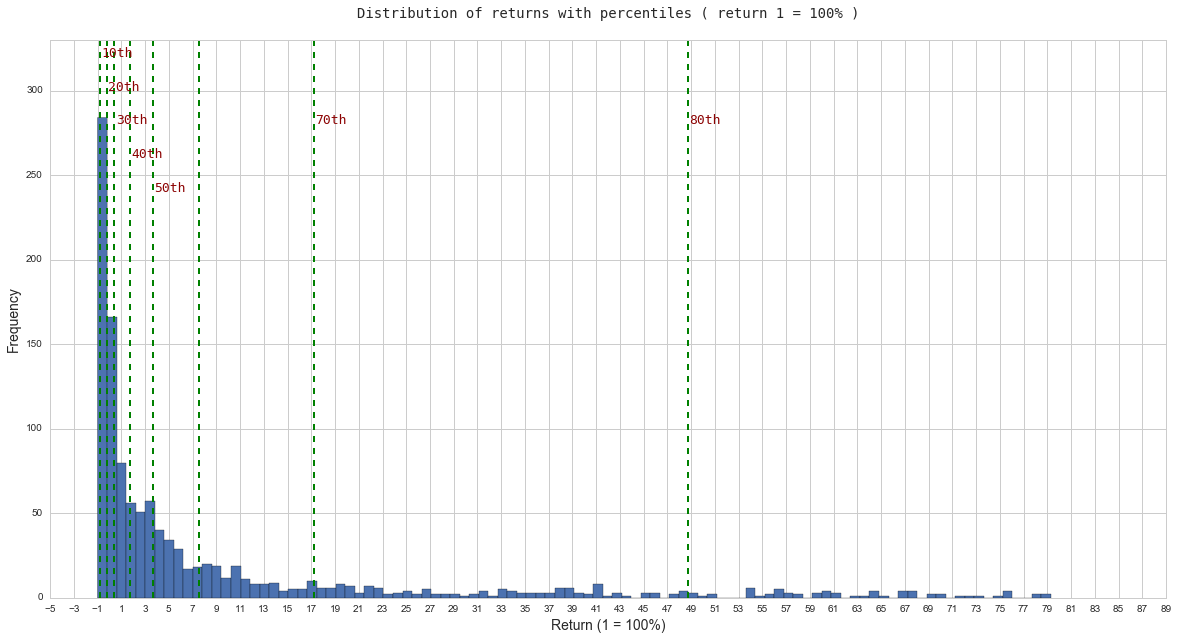

In [37]:
fig = plt.figure(figsize=(20,10))
data = [ret for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 80]
plt.title("Distribution of returns with percentiles ( return 1 = 100% )", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)

plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Return (1 = 100%)", fontsize = 14)

plt.hist(data, bins = 100)
plt.xlim((-2, 80))
plt.ylim(0, 330)
plt.xticks(range(-5, 90, 2))


font = {'family': 'Monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

#plt.axvline(np.array(data).mean(), color='b', linestyle='dashed', linewidth=2)
np_original_arr = np.array([ret for age, ret in returns])
N = 10
for i in range(0, N):
    
    percentile =(i + 1.0) / N * 100 
    plt.axvline(np.percentile(np_original_arr, percentile), color='g', linestyle='dashed', linewidth=2)
    #plt.text(np.percentile(np_original_arr, percentile), 180, "aa", fontdict=font)
    print ("Percentile: {}th -> {}x".format(int(round(percentile, 0)), round(np.percentile(rets, percentile), 2)))
    
    
plt.text(float(np.percentile(np_original_arr, 10)) + 0.1, 320, "10th", fontdict=font)  
plt.text(float(np.percentile(np_original_arr, 20)) + 0.1, 300, "20th", fontdict=font)  
plt.text(float(np.percentile(np_original_arr, 30)) + 0.1, 280, "30th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 40)) + 0.1, 260, "40th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 50)) + 0.1, 240, "50th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 70)) + 0.1, 280, "70th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 80)) + 0.1, 280, "80th", fontdict=font)
plt.show()

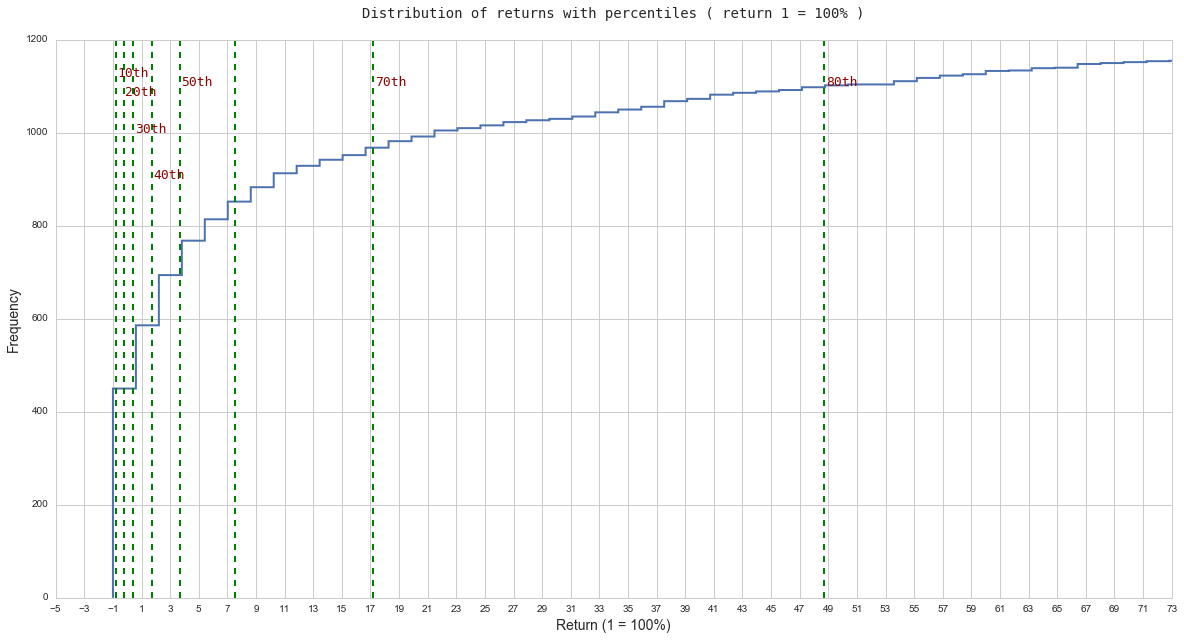

In [53]:
fig = plt.figure(figsize=(20,10))
data = [ret for age, ret in returns if ret - np.mean(returns) < 1 * np.std(returns) and ret < 80]
plt.title("Distribution of returns with percentiles ( return 1 = 100% )", fontname='Monospace', fontdict={'fontsize':14}, y=1.03)

plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Return (1 = 100%)", fontsize = 14)

mu = 200
sigma = 25
n_bins = 50

n, bins, patches= plt.hist(data, bins = n_bins, histtype='step', cumulative=True, linewidth=2)
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical', c="b")
plt.xlim((-2, 70))

#plt.ylim(0, 330)
plt.xticks(range(-5, 75, 2))


font = {'family': 'Monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

#plt.axvline(np.array(data).mean(), color='b', linestyle='dashed', linewidth=2)
np_original_arr = np.array([ret for age, ret in returns])
N = 10
for i in range(0, N):
    
    percentile =(i + 1.0) / N * 100 
    plt.axvline(np.percentile(np_original_arr, percentile), color='g', linestyle='dashed', linewidth=2)
    #plt.text(np.percentile(np_original_arr, percentile), 180, "aa", fontdict=font)
    #print ("Percentile: {}th -> {}x".format(int(round(percentile, 0)), round(np.percentile(rets, percentile), 2)))
    
plt.text(float(np.percentile(np_original_arr, 10)) + 0.1, 1120, "10th", fontdict=font)  
plt.text(float(np.percentile(np_original_arr, 20)) + 0.1, 1080, "20th", fontdict=font)  
plt.text(float(np.percentile(np_original_arr, 30)) + 0.1, 1000, "30th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 40)) + 0.1, 900, "40th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 50)) + 0.1, 1100, "50th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 70)) + 0.1, 1100, "70th", fontdict=font)
plt.text(float(np.percentile(np_original_arr, 80)) + 0.1, 1100, "80th", fontdict=font)
plt.show()